In [20]:
# Post Training Scientific Computing
# DV23-1 Dave Andrew Nathaniel

import numpy as np

def is_diagonally_dominant(matrix):
    diagonal = np.diag(np.abs(matrix))
    off_diagonal = np.sum(np.abs(matrix), axis=1) - diagonal

    if np.all(diagonal >= off_diagonal):
        return True
    else:
        return False

def solve_gauss_seidel(coeff_matrix, target_vector, epsilon=0.08, max_iterations=500):
    coefficient_matrix = np.array(coeff_matrix)
    target_vector = np.array(target_vector)

    if not is_diagonally_dominant(coefficient_matrix):
        print("Not diagonally dominant")
    else :
        print("Diagonally dominant")

    diagonal = np.diag(coefficient_matrix)
    coefficient_matrix = -coefficient_matrix
    np.fill_diagonal(coefficient_matrix, 0)

    solution = np.zeros(target_vector.shape[0])

    for _ in range(max_iterations):
        new_solution = np.array(solution)
        for idx, row in enumerate(coefficient_matrix):
            new_solution[idx] = (target_vector[idx] + np.dot(row, new_solution)) / diagonal[idx]

        euclidean_norm = np.linalg.norm(new_solution - solution)

        if euclidean_norm < epsilon:
            return new_solution

        solution = new_solution

    print("Not convergent")

X_list = [
    [[3, 1, -1], [2, 4, 1], [1, 2, 7]],
    [[5, 2, 1], [1, 3, -2], [-1, 1, 3]],
    [[2, 3, -1], [4, 6, 2], [1, -1, 5]],
    [[6, -1, 3], [1, 4, -2], [2, 3, 8]],
    [[1, 2, 3], [4, 5, 6], [7, 8, 9]],
]

Y_list = [[10, 5, 16], [15, 3, 0], [8, 10, 2], [20, 4, 12], [1, 2, 3]]

for i, (coeff_matrix, target_vector) in enumerate(zip(X_list, Y_list)):
    print("Equation", i+1, ":")
    for row in coeff_matrix:
        print(row)
    print("Target vector: ", target_vector)
    print()

    solution = solve_gauss_seidel(coeff_matrix, target_vector)
    
    if solution is not None:
        print("Solution:")
        for i, value in enumerate(solution):
            print("x", i+1, ":", value)
        print("Convergent")
        print()


Equation 1 :
[3, 1, -1]
[2, 4, 1]
[1, 2, 7]
Target vector:  [10, 5, 16]

Diagonally dominant
Solution:
x 1 : 4.535789592985091
x 2 : -1.537112049720367
x 3 : 2.076919215207949
Convergent

Equation 2 :
[5, 2, 1]
[1, 3, -2]
[-1, 1, 3]
Target vector:  [15, 3, 0]

Diagonally dominant
Solution:
x 1 : 2.627753086419753
x 2 : 0.5609547325102882
x 3 : 0.6889327846364882
Convergent

Equation 3 :
[2, 3, -1]
[4, 6, 2]
[1, -1, 5]
Target vector:  [8, 10, 2]

Not diagonally dominant
Solution:
x 1 : 6.916019199999999
x 2 : -2.458009599999999
x 3 : -1.4748057599999995
Convergent

Equation 4 :
[6, -1, 3]
[1, 4, -2]
[2, 3, 8]
Target vector:  [20, 4, 12]

Diagonally dominant
Solution:
x 1 : 3.147080503864053
x 2 : 0.479127554245937
x 3 : 0.5335570411917604
Convergent

Equation 5 :
[1, 2, 3]
[4, 5, 6]
[7, 8, 9]
Target vector:  [1, 2, 3]

Not diagonally dominant
Not convergent


[ 0.          0.05025126  0.10050251  0.15075377  0.20100503  0.25125628
  0.30150754  0.35175879  0.40201005  0.45226131  0.50251256  0.55276382
  0.60301508  0.65326633  0.70351759  0.75376884  0.8040201   0.85427136
  0.90452261  0.95477387  1.00502513  1.05527638  1.10552764  1.15577889
  1.20603015  1.25628141  1.30653266  1.35678392  1.40703518  1.45728643
  1.50753769  1.55778894  1.6080402   1.65829146  1.70854271  1.75879397
  1.80904523  1.85929648  1.90954774  1.95979899  2.01005025  2.06030151
  2.11055276  2.16080402  2.21105528  2.26130653  2.31155779  2.36180905
  2.4120603   2.46231156  2.51256281  2.56281407  2.61306533  2.66331658
  2.71356784  2.7638191   2.81407035  2.86432161  2.91457286  2.96482412
  3.01507538  3.06532663  3.11557789  3.16582915  3.2160804   3.26633166
  3.31658291  3.36683417  3.41708543  3.46733668  3.51758794  3.5678392
  3.61809045  3.66834171  3.71859296  3.76884422  3.81909548  3.86934673
  3.91959799  3.96984925  4.0201005   4.07035176  4.

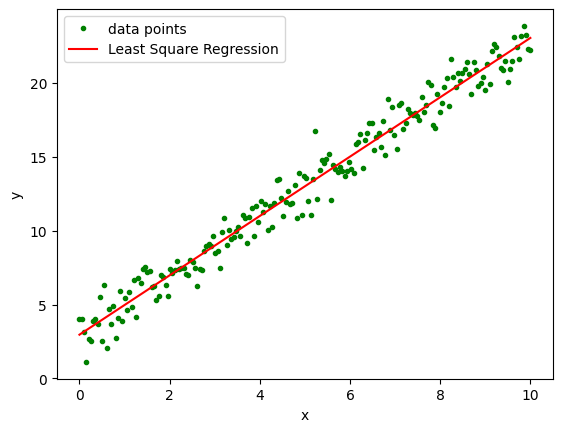

Pseudoinverse Method:
[[2.00788562]
 [2.95841411]]


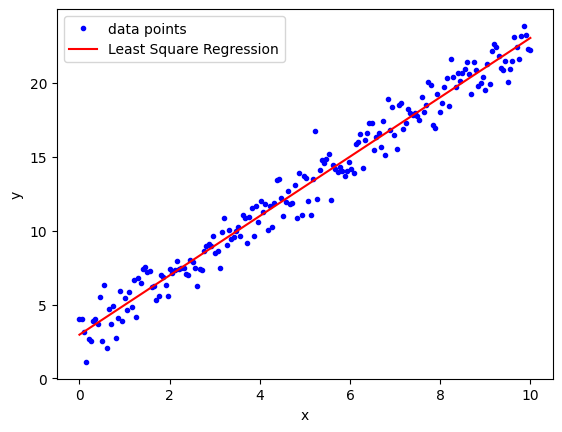

In [21]:
import matplotlib.pyplot as plt

dataset_x = np.linspace(0, 10, 200)
dataset_y = 2 * dataset_x + 3 + np.random.normal(0, 1, 200)

print(dataset_x)
print(dataset_y)

A = np.vstack([dataset_x, np.ones(len(dataset_x))]).T
y = dataset_y[:, np.newaxis]

# Inverse Method

alpha_inv = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), y)
print("Inverse Method:")
print(alpha_inv)

plt.plot(dataset_x, dataset_y, "g.")
plt.plot(dataset_x, alpha_inv[0] * dataset_x + alpha_inv[1], "r")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(['data points', 'Least Square Regression'])
plt.show()

# Pseudoinverse Method

alpha_pinv = np.dot(np.dot(np.linalg.pinv(np.dot(A.T, A)), A.T), y)
print("Pseudoinverse Method:")
print(alpha_pinv)

plt.plot(dataset_x, dataset_y, "b.")
plt.plot(dataset_x, alpha_pinv[0] * dataset_x + alpha_pinv[1], "r")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(['data points', 'Least Square Regression'])
plt.show()


In [22]:
def f(x):
    return ((5 * (x**5)) - (3 * (x**4)) + (8 * x**3) - (2 * x**2) + (12 * x) - 6)

def g(x):
    return ((25 * (x**4)) - (12 * (x**3)) + (24 * x**2) - (4 * x) + 12)

# Newton Rhapson Method
def newton_raphson_method(initial_guess=5, tolerance=0.08, max_iterations=500):
    i = 0
    x = initial_guess
    
    while i < max_iterations:
        x_new = x - f(x) / g(x)
        print("Iteration", i+1,":", x_new)
        
        if np.abs(f(x_new)) < tolerance:
            print("Root value :", x_new)
            return
        
        x = x_new
        i += 1
    
    print("Max iterations!!!")

# Bisection Method
def bisection_method(a=-7, b=23, tolerance=0.08, max_iterations=500):
    if np.sign(f(a)) == np.sign(f(b)):
        print("Coordinates invalid: a and b must have opposite signs.")
        return
    
    for i in range(max_iterations):
        c = (a + b) / 2
        print("Iteration", i+1, ":", c)
        
        if np.abs(f(c)) < tolerance:
            print("Root value :", c)
            return
        elif np.sign(f(c)) == np.sign(f(a)):
            a = c
        elif np.sign(f(c)) == np.sign(f(b)):
            b = c
    
    print("Max iteration!!!")

print("Newton-Raphson Method: ")
newton_raphson_method()

print()

print("Bisection Method: ")
bisection_method()


Newton-Raphson Method: 
Iteration 1 : 3.9974859006591017
Iteration 2 : 3.1872498596111742
Iteration 3 : 2.527577574151553
Iteration 4 : 1.9835797887386852
Iteration 5 : 1.5256007665747895
Iteration 6 : 1.1301350980990215
Iteration 7 : 0.7911593120723794
Iteration 8 : 0.5537641636551094
Iteration 9 : 0.4753673827546387
Iteration 10 : 0.4702089330606201
Root value : 0.4702089330606201

Bisection Method: 
Iteration 1 : 8.0
Iteration 2 : 0.5
Iteration 3 : -3.25
Iteration 4 : -1.375
Iteration 5 : -0.4375
Iteration 6 : 0.03125
Iteration 7 : 0.265625
Iteration 8 : 0.3828125
Iteration 9 : 0.44140625
Iteration 10 : 0.470703125
Root value : 0.470703125


In [23]:
def f(x):
    return ((2*x**4) + (3*x**3) + (x**2) + (4*x) + 7)

start = 0
end = 35000
min_steps = 6500

step_size = (end - start) / (min_steps - 1)
steps = int((end - start) / step_size) + 1

x_values = np.linspace(start, end, steps)
y_values = f(x_values)

# Left Riemann
left_integral = step_size * sum(y_values[:steps-1])

# Right Riemann
right_integral = step_size * sum(y_values[1:])

# Middle Point Riemann
x_mid = (x_values[:steps-1] + x_values[1:]) / 2
y_mid = f(x_mid)
mid_integral = step_size * sum(y_mid)

# Trapezoid Rule
trapezoid_integral = step_size / 2 * (y_values[0] + 2 * sum(y_values[1:steps-1]) + y_values[steps-1])

# Print the results
print("Left Riemann Integral: ", left_integral)
print("Right Riemann Integral: ", right_integral)
print("Middle Point Riemann Integral: ", mid_integral)
print("Trapezoid Rule Integral: ", trapezoid_integral)


Left Riemann Integral:  2.100179443394453e+22
Right Riemann Integral:  2.101795819020209e+22
Middle Point Riemann Integral:  2.10098750685295e+22
Trapezoid Rule Integral:  2.100987631207331e+22
